<a href="https://colab.research.google.com/github/PeterStoreshaw/PeterStoreshaw.github.io/blob/master/Copy_of_Question_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Question 3, Fake vs Real Images

To Begin with we will use the code from fast AI
'bird or not'

In [1]:
# It's a good idea to ensure you're running the latest version of any libraries you need.
# `!pip install -Uqq <libraries>` upgrades to the latest version of <libraries>
# NB: You can safely ignore any warnings or errors pip spits out about running as root or incompatibilities
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai

Install Fastbook

In [2]:
!pip install fastbook

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 719.8/719.8 kB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 110.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 48.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 85.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 17.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 28.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 18.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 54.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 28.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 79.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━

Download all the packages and unzip the files we want to use.

In [7]:

from fastcore.all import *
from fastbook import search_images_ddg 
from fastdownload import download_url
from fastai.vision.all import *

In [8]:
from google.colab import drive

drive.mount('/content/drive')

!unzip '/content/drive/MyDrive/archive.zip'

path = Path('train') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Archive:  /content/drive/MyDrive/archive.zip
replace test/FAKE/0 (10).jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

If the previous step was run and successful SKIP THIS STEP.

## Step 2: Train our model

In [9]:
path = Path('train') 

Create the data block.

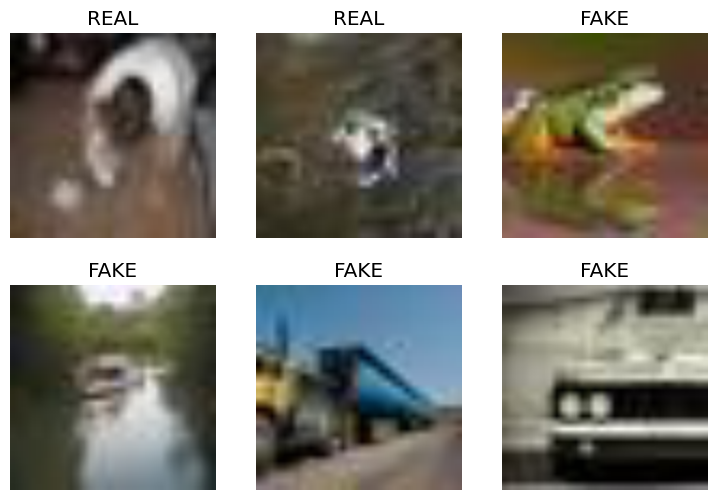

In [11]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path)

dls.show_batch(max_n=6)

Run the learner. Here we can change the aritecture to see if there are any differnces. As well as the fine tuning. When comparing the confusion matrix we can improve the program.

In [17]:
learn = vision_learner(dls, resnet101, metrics=error_rate)
learn.fine_tune(1)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to /root/.cache/torch/hub/checkpoints/resnet101-63fe2227.pth
100%|██████████| 171M/171M [00:03<00:00, 56.4MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,0.169641,0.130955,0.051550,13:09


epoch,train_loss,valid_loss,error_rate,time
0,0.069489,0.050770,0.017850,17:40


## Step 3: Check Accuracy

Create and plot a confusion matrix


The confusion matrix will help identify the accuracy. 
It works by finding the true negative, true positive, false negative and false positive for each selection. 
So, if we predicted cat, and it was a cat that is a true positive. 
The matrix this code will create just looks at true positives and incorrect choices. If the majority of diagonal line from left to right is all 100 percent we know that the system is perfectly accurate. 


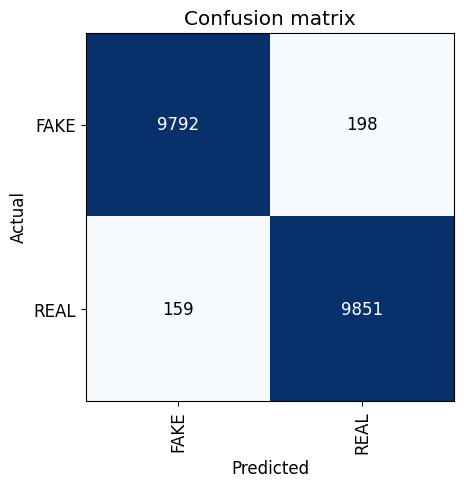

In [18]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()



```
# This is formatted as code
```

Show the worst 8 photos for confusion.
 This shows us the 8 most troublesome photos that the sytem is stugling to correctly identify.

In [ ]:
interp.plot_top_losses(8, nrows=1)
